# COVID-19 Analysis and Visualization
# Introduction to COVID-19 
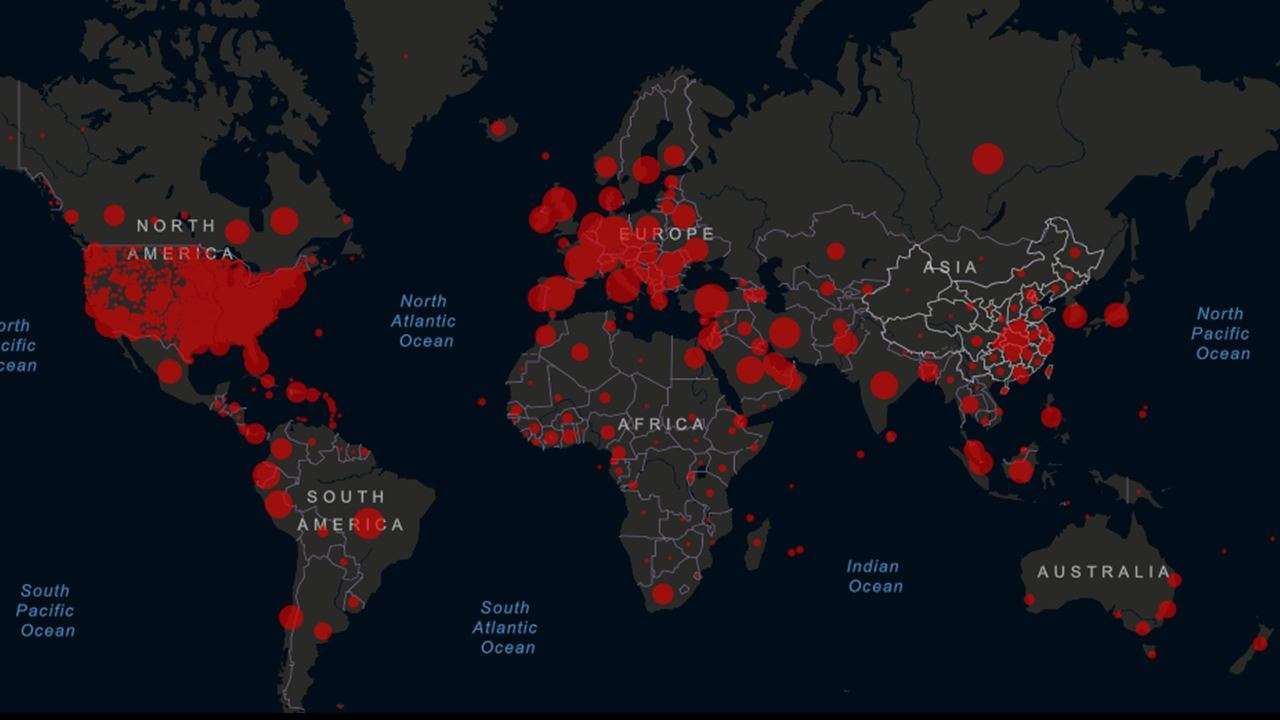

**Coronaviruses** are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as **Middle East Respiratory Syndrome (MERS)** and **Severe Acute Respiratory Syndrome (SARS)**. The most recently discovered coronavirus causes coronavirus disease COVID-19 - **World Health Organization**

 The number of new cases are increasing day by day around the world. This dataset has information from the countries and states of World at daily level.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Content :

* [Imports and Datasets](#Imports-and-Datasets)
* [General Analysis](#General-Analysis)
* [Preprocessing](#Preprocessing)
* [Total Confirmed, Cured, Death and Active cases in each country](#Total-Confirmed,-Cured,-Death-and-Active-cases-in-each-country)
* [Top 10 countries Analysis & Visualization](#Top-10-countries-Analysis-&-Visualization)
     * [Confirmed, Cured and Death Cases (Bar Plot Viz)](#Visualizing-cases-for-top-10-affected-countries)        
     * [Visualizing cases for top 10 countries combinedly](#Visualizing-cases-for-top-10-countries-combinedly.)
* [Visualization on Pie Chart](#Visualization-on-Pie-Chart)
* [Visualizing total cases in World according to dates](#Visualizing-total-cases-in-World-according-to-dates)
* [Recovery rate and Date Rate in World](#Recovery-rate-and-Date-Rate-in-World)
* [COVID 19: Range Slider Visualization](#COVID-19:-Range-Slider-Visualization)
     * [COVID 19: Confirmed Cases](#COVID-19:-Confirmed-Cases)
     * [COVID 19: Cured Cases](#COVID-19:-Cured-Cases)        
     * [COVID 19: Death Cases](#COVID-19:-Death-Cases) 
     * [COVID 19: Active Cases](#COVID-19:-Active-Cases)
* [Visualization on Map](#Visualization-on-Map)
     * [COVID 19: Confirmed Cases On Map](#COVID-19:-Confirmed-Cases-On-Map) 
     * [COVID 19: Cured Cases On Map](#COVID-19:-Cured-Cases-On-Map)
     * [COVID 19: Death Cases On Map](#COVID-19:-Death-Cases-On-Map)
     * [COVID 19: Active Cases On Map](#COVID-19:-Active-Cases-On-Map)
* [Valuable Feedback](#Valuable-Feedback)     

# Imports and Datasets

### **Importing Libraries**

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Dataset
* 2019 Novel Coronavirus COVID-19  Data Repository by Johns Hopkins University.
* This dataset is updated on daily basis by Johns Hopkins CSSE
[(link)](https://github.com/CSSEGISandData/COVID-19)

In [ ]:
df = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv")
countries_iso = pd.read_csv("/kaggle/input/countries-of-the-world-iso-codes-and-population/country_codes_2020.csv")
countries=pd.read_csv("/kaggle/input/countries-of-the-world-iso-codes-and-population/countries_by_population_2019.csv")

# General Analysis
Getting country wise data

In [ ]:
df.head()

In [ ]:
df.info()

# Preprocessing

In [ ]:
df.drop('Last Update',axis=1,inplace = True)

#Making new column of Active Cases in dataset
df['Active'] = df['Confirmed']-df['Deaths']-df['Recovered']

#Converting string Date time into Python Date time object
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')
df['Active']=df['Active'].astype('int')

#Renaming columns
df.rename(columns = {'ObservationDate':'Date','Recovered':'Cured','Province/State':'State','Country/Region':'Country'}, inplace = True)

#Replacing null values
df["State"].fillna("No State",inplace=True) 

data_df=df.groupby('Date').sum()
data_df.reset_index(inplace=True)

#Making new columns of Recovery and Death Rate.
data_df['Recovery_Rate']=data_df['Cured']/data_df['Confirmed']
data_df['Death_Rate']=data_df['Deaths']/data_df['Confirmed']

# Total Confirmed, Cured, Death and Active cases in each country
Getting values of Total number of confirmed cases, deaths reported, cured and active cases all across the world

In [ ]:
df_updated = df[df['Date'] == max(df['Date'])].reset_index()
df_updated_grouped = df_updated.groupby('Country')['Confirmed', 'Deaths', 'Cured','Active'].sum().reset_index()
temp = df_updated.groupby(['Country', 'State'])['Confirmed', 'Cured', 'Deaths','Active'].max()
head20 = temp.head(20)
head20.style.background_gradient(cmap='Pastel1_r')


## **Total Confirmed, Cured and Death cases in World.**
Calculating Total Confirmed, Cured and Death cases in World by summing all the cases of each country.

In [ ]:
temp.sum()

# Top 10 countries Analysis & Visualization
Analysing and Visualizing Confirmed, Cured, Death and Active cases of top 10 affected countries.

## **Top countries with Confirmed cases.**
Countries which have most to least number of Confirmed cases

In [ ]:
temp_f = df_updated_grouped[['Country', 'Confirmed','Cured','Deaths','Active']]
temp_f = temp_f.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
head10 = temp_f.head(10)
head10.style.background_gradient(cmap='Pastel1_r')

In [ ]:
temp10=temp_f.head(10)
temp_fc=list(temp10['Country'])


## **Visualizing cases for top 10 affected countries**

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=temp_fc,y=temp10['Confirmed'])
plt.grid(True)
plt.title('Confirmed Cases',size = 20)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Country",fontsize = 18)
plt.ylabel('Confirmed in crore',fontsize = 18)
plt.legend(loc=0)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=temp_fc,y=temp10['Cured'])
plt.grid(True)
plt.title('Cured Cases',size = 20)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Country",fontsize = 18)
plt.ylabel('Cured in crore',fontsize = 18)
plt.legend(loc=0)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=temp_fc,y=temp10['Deaths'])
plt.grid(True)
plt.title('Death Cases',size = 20)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Country",fontsize = 18)
plt.ylabel('Deaths',fontsize = 18)
plt.legend(loc=0)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=temp_fc,y=temp10['Active'])
plt.grid(True)
plt.title('Active Cases',size = 20)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Country",fontsize = 18)
plt.ylabel('Active in million',fontsize = 18)
plt.legend(loc=0)
plt.show()

## **Visualizing cases for top 10 countries combinedly.**

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(size=5,labelsize = 13)
plt.ylabel('Country',fontsize = 18)
bar1=sns.barplot(x="Confirmed",y="Country",data=temp10,
            label="Confirmed", color="#0065b3")

bar2=sns.barplot(x="Cured", y="Country", data=temp10,
            label="Cured", color="#03ff39")

bar3=sns.barplot(x="Deaths", y="Country", data=temp10,
            label="Deaths", color="red")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Total Cases in crore",fontsize = 18)
plt.show()

In [ ]:
world_province_cases=temp10[['Confirmed','Cured','Active','Deaths','Country']].groupby('Country').max().sort_values('Confirmed',ascending=False)
world_province_cases.plot(kind='bar',width=0.95,colormap='rainbow',figsize=(10,5),fontsize = 13)
plt.grid(True)
plt.show()

# Visualization on Pie Chart
A pie chart data visualizaton of the top 10 affected countries

## **Visualizing Confirmed cases for top 10 countries**

In [ ]:
fig = plt.figure(figsize=(7,7))
conf_per_state = temp10.groupby('Country')['Confirmed'].max().sort_values(ascending=False)

def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_state.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
conf_per_state = temp10.groupby('Country')['Cured'].max().sort_values(ascending=False)

def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_state.plot(kind="pie",title='Percentage of cured cases per country',autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
conf_per_state = temp10.groupby('Country')['Deaths'].max().sort_values(ascending=False)

def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_state.plot(kind="pie",title='Percentage of death cases per country',autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
conf_per_state = temp10.groupby('Country')['Active'].max().sort_values(ascending=False)

def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_state.plot(kind="pie",title='Percentage of active cases per country',autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()

# Visualizing total cases in World according to dates
Below, you can see this time series for the Total Confirmed, Cured, Deaths and Active cases in World.

In [ ]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases in millions',fontsize = 20)
plt.title("Total Confirmed, Cured, Deaths and Active cases in World" , fontsize = 20)

ax1 = plt.plot_date(data=data_df,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=data_df,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=data_df,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
ax4 = plt.plot_date(data=data_df,y= 'Active',x= 'Date',label = 'Active',linestyle ='-',color = 'y')

plt.legend();

# Recovery rate and Date Rate in World
Below, you can see this time series for the Recovery rate and Date Rate in World.

In [ ]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Rate',fontsize = 20)
plt.title("Recovery and Death Rate in World" , fontsize = 20)

ax1 = plt.plot_date(data=data_df,y= 'Recovery_Rate',x= 'Date',label = 'Recovery_rate',linestyle ='-',color = 'g')
ax2 = plt.plot_date(data=data_df,y= 'Death_Rate',x= 'Date',label = 'Death_rate',linestyle ='-',color = 'r')

plt.legend();

# COVID 19: Range Slider Visualization
Visualized the total COVID cases date wise on a range slider. Here you can analyze the data between a particular time period than can be days, months or a year by just sliding the below slider.

### COVID 19: Confirmed Cases

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(data_df.Date), y=list(data_df.Confirmed)))

# Set title
fig.update_layout(
    title_text="Confirmed cases over time"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

### COVID 19: Cured Cases

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(data_df.Date), y=list(data_df.Cured)))

# Set title
fig.update_layout(
    title_text="Cured cases over time"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

### COVID 19: Death Cases

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(data_df.Date), y=list(data_df.Deaths)))

# Set title
fig.update_layout(
    title_text="Death cases over time"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

### COVID 19: Active Cases

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(data_df.Date), y=list(data_df.Active)))

# Set title
fig.update_layout(
    title_text="Active cases over time"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

# Visualization on Map
Visualizing the Total COVID cases across the World on the World Map. Here the most affected country can be seen darker in colour and the less affected countries can be seen lighter in colour.

Here I am using the datasets from [Countries of the World; ISO codes and population](https://www.kaggle.com/erikbruin/countries-of-the-world-iso-codes-and-population) .As I want to use built-in geometries of plotly.express later on to plot numbers on a world map, I am also merging the three-letter ISO country code to the dataframe.

Renaming the Country names according to dataset, so that mismatching can be fixed and cases of the country can be visualized on map.

In [ ]:
cols_to_drop = ['Rank', 'pop2018','GrowthRate', 'area', 'Density']
countries = countries.drop(columns = cols_to_drop)


countries = countries.merge(countries_iso[['name', 'cca3']], on = ['name'], how = "left")

cols_to_rename = {'name': 'Country', 'pop2019': 'Population', 'cca3': 'ISO'}
countries = countries.rename(columns = cols_to_rename)

#fixing the most important mismatches
countries_to_rename = {'US': 'United States',\
                       'Mainland China': 'China',\
                       'UK': 'United Kingdom',\
                       'Congo (Kinshasa)': 'DR Congo',\
                       'North Macedonia': 'Macedonia',\
                       'Republic of Ireland': 'Ireland',\
                       'Congo (Brazzaville)': 'Republic of the Congo'}

temp_f['Country'] = temp_f['Country'].replace(countries_to_rename)

temp_map = temp_f.merge(countries, on = "Country", how = "left")

In [ ]:
temp_map.head()


### COVID 19: Confirmed Cases On Map
Here is the Total Confirmed cases of each country on world map.

In [ ]:
fig = px.choropleth(temp_map, locations="ISO",
                    color="Confirmed",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona confirmed cases",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

### COVID 19: Cured Cases On Map
Here is the Total Cured cases of each country on world map.

In [ ]:
fig = px.choropleth(temp_map, locations="ISO",
                    color="Cured",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlGn)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona cured cases",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

### COVID 19: Death Cases On Map
Here is the Total Death cases of each country on world map.

In [ ]:
fig = px.choropleth(temp_map, locations="ISO",
                    color="Deaths",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona death cases",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

### COVID 19: Active Cases On Map
Here is the Total Active cases of each country on world map.

In [ ]:
fig = px.choropleth(temp_map, locations="ISO",
                    color="Active",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona active cases",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

### Vaccination

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from colorama import Fore 
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_vaccine=pd.read_csv(r"../input/covid19-in-india/covid_vaccine_statewise.csv")

In [ ]:
df_vaccine.tail()

In [ ]:
df_vaccine.drop('Total Individuals Vaccinated',axis=1,inplace = True)

#Making new column of Total Vaccinatons in dataset
df_vaccine['Total Vaccinatons'] = df_vaccine['First Dose Administered']+df_vaccine['Second Dose Administered']

#Renaming columns
df_vaccine.rename(columns = {'Updated On':'Date'}, inplace = True)

In [ ]:
df_vaccine.info()

In [ ]:
male = df_vaccine["Male(Individuals Vaccinated)"].max() 
female = df_vaccine["Female(Individuals Vaccinated)"].max()  
trans = df_vaccine["Transgender(Individuals Vaccinated)"].max()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [ ]:
Rajasthan = df_vaccine[df_vaccine["State"]=="Rajasthan"]
fig_vaccine = px.line(Rajasthan,x="Date",y="Total Vaccinatons",title="Vaccination over time-->Rajasthan")  
fig_vaccine.update_xaxes(rangeslider_visible=True) 

In [ ]:
fig_vaccine = px.line(Rajasthan,x="Date",y="Total CoviShield Administered",title="CoviShield Administered-->Rajasthan")  
fig_vaccine.update_xaxes(rangeslider_visible=True) 

In [ ]:
fig_vaccine = px.line(Rajasthan,x="Date",y="Total Covaxin Administered",title="Covaxin Administered-->Rajasthan")  
fig_vaccine.update_xaxes(rangeslider_visible=True) 

In [ ]:
df_vaccine_state=pd.read_csv('../input/india-covid19-vaccination-data/state.csv')

In [ ]:
df_vaccine_state.info()

In [ ]:
df_vaccine_state.head()

In [ ]:
df_updated_vaccine = df_vaccine_state[df_vaccine_state['date'] == max(df_vaccine_state['date'])].reset_index()
df_updated_grouped_vaccine = df_updated_vaccine.groupby('State')['Total'].sum().reset_index()

temp_f_vaccine = df_updated_grouped_vaccine[['State', 'Total']]
temp_f_vaccine = temp_f_vaccine.sort_values(by='State')
temp_f_vaccine = temp_f_vaccine.reset_index(drop=True)
temp_f_vaccine.style.background_gradient(cmap='Pastel1_r')

In [ ]:
temp_f_vaccine = df_updated_grouped_vaccine[['State', 'Total']]
temp_f_vaccine = temp_f_vaccine.sort_values(by='Total', ascending=False)
temp_f_vaccine = temp_f_vaccine.reset_index(drop=True)
head10_vaccine = temp_f_vaccine.head(10)
head10_vaccine.style.background_gradient(cmap='Pastel1_r')

# Valuable Feedback

* [LinkedIn](https://www.linkedin.com/in/nakul-saraswat-231a1014a/)
* **Please UPVOTE if you liked the notebook.**
* **Your FEEDBACK is much appreciated.**